# Life Expectancy By Country

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country's economic success might impact the life expectancy in that area.

## Access the Data

1. The data can be found in the variable named `data`.

   To begin, let's get a sense of what this data looks like. Print `data` to see the first 5 rows of the dataset.
   
   Look at the names of the columns. What other pieces of information does this dataset contain?
   
   You may want to comment out this print statement after looking at the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("country_data.csv")
print(data.head())

               Country  Life Expectancy          GDP
0          Afghanistan         58.19375   340.015425
1              Albania         75.15625  2119.726679
2              Algeria         73.61875  2847.853392
3               Angola         49.01875  1975.143045
4  Antigua and Barbuda         75.05625  9759.305728


2. Let's isolate the column that contains the life expectancy and store it in a variable named `life_expectancy`. To get a single column from a Pandas DataFrame, use this syntax:

   ```py
   single_column = dataFrameName["columnName"]
   ```
   
   Make sure to pay attention to capitalization and spaces when using the column name!

In [2]:
life_expectancy = data['Life Expectancy']
print(life_expectancy.head())

0    58.19375
1    75.15625
2    73.61875
3    49.01875
4    75.05625
Name: Life Expectancy, dtype: float64


## Find the Quantiles

3. We can now use NumPy functions on that column! Let's find the quartiles of `life_expectancy`. Store the result in a variable named `life_expectancy_quartiles` and print the results.

In [3]:
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.50, 0.75])
print(life_expectancy_quartiles)

[62.325     72.525     75.4421875]


4. Nice work! By looking at those three values you can get a sense of the spread of the data. For example, it seems like some of the data is fairly close together &mdash; a quarter of the data is between `72.5` years and `75.4` years.

   Could you predict what the histogram might look like from those three numbers? Plot the histogram. Does it look how you expected?

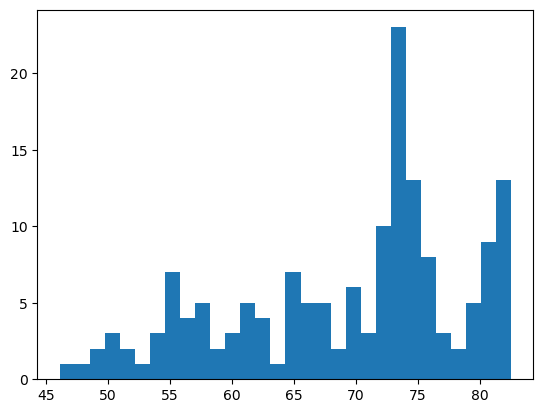

<Figure size 640x480 with 0 Axes>

In [4]:
plt.hist(life_expectancy, bins=30)

plt.show()
plt.clf()

5. Let's take a moment to think about the meaning of these quartiles. If your country has a life expectancy of `70` years, does that fall in the first, second, third, or final quarter of the data?

In [5]:
#My country in the second quarter

## Splitting the Data by GDP

6. GDP is a measure of a country's wealth. Let's now use the GDP data to see if life expectancy is affected by this value.

   Let's split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for "low GDP countries" and "high GDP countries".
   
   To start, let's isolate the GDP column and store it in a variable named `gdp`.

In [6]:
gdp = data.GDP
print(gdp.head())

0     340.015425
1    2119.726679
2    2847.853392
3    1975.143045
4    9759.305728
Name: GDP, dtype: float64


7. We now want to find the median GDP. You can use NumPy's `np.median()` function, but since the median is also a quantile, we can call `np.quantile()` using `0.5` as the second parameter.

   Store the median in a variable named `median_gdp`. Print that variable to see the median.

In [7]:
median_gdp = np.median(gdp)
# OR = np.quantile(gdp, 0.5)
print(median_gdp)

2938.0781155


8. Let's now grab all of the rows from our original dataset that have a GDP less than or equal to the median. 
   
   Do the same for all of the rows that have a GDP higher than the median. Store those rows in a variable named `high_gdp`.
 

In [8]:
low_gdp = data[data.GDP <= median_gdp]
high_gdp = data[data.GDP > median_gdp]
print(low_gdp.head())

       Country  Life Expectancy          GDP
0  Afghanistan         58.19375   340.015425
1      Albania         75.15625  2119.726679
2      Algeria         73.61875  2847.853392
3       Angola         49.01875  1975.143045
6      Armenia         73.40000  1999.986318


9. Now that we've split the data based on the GDP, let's see how the life expectancy of each group compares to each other.

   Find the quartiles of the `"Life Expectancy"` column of `low_gdp`. Store the quartiles in a variable named `low_gdp_quartiles`. Print the results.

In [9]:
low_gdp_quartiles = np.quantile(low_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(low_gdp_quartiles)

[56.3375  64.34375 71.7375 ]


10. Find the quartiles of the high GDP countries and store them in a variable named `high_gdp_quartiles`. This should look very similar to the last line of code you wrote. Print the results.

In [10]:
high_gdp_quartiles = np.quantile(high_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(high_gdp_quartiles)

[72.965625 75.15625  80.521875]


## Histogram and Conclusions

11. By looking at the quantiles, you should get a sense of the spread and central tendency of these two datasets. But let's plot a histogram of each dataset to really compare them.

    At the bottom of your code, add these four lines:
    ```py
    plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")
    plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")
    plt.legend()
    plt.show()
    ```

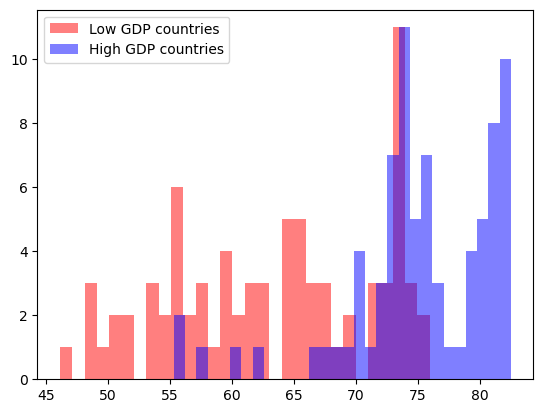

<Figure size 640x480 with 0 Axes>

In [11]:
plt.hist(low_gdp['Life Expectancy'], alpha=0.5, color='red', label='Low GDP countries', bins=30)
plt.hist(high_gdp["Life Expectancy"], alpha=0.5, color='blue', label='High GDP countries', bins=30)
plt.legend()
plt.show()
plt.clf()

12. We can now truly see the impact GDP has on life expectancy.

    Once again, consider a country that has a life expectancy of `70` years. If that country is in the top half of GDP countries, is it in the first, second, third, or fourth quarter of the data with respect to life expectancy? What if the country is in the bottom half of the countries?

In [12]:
#first question: 1st quarter
#second question: 3rd quarter